In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.dates as mdates

In [3]:
df =pd.read_csv(r'C:\Users\DELL\Desktop\ACADEMIC PROJECT\file.csv')

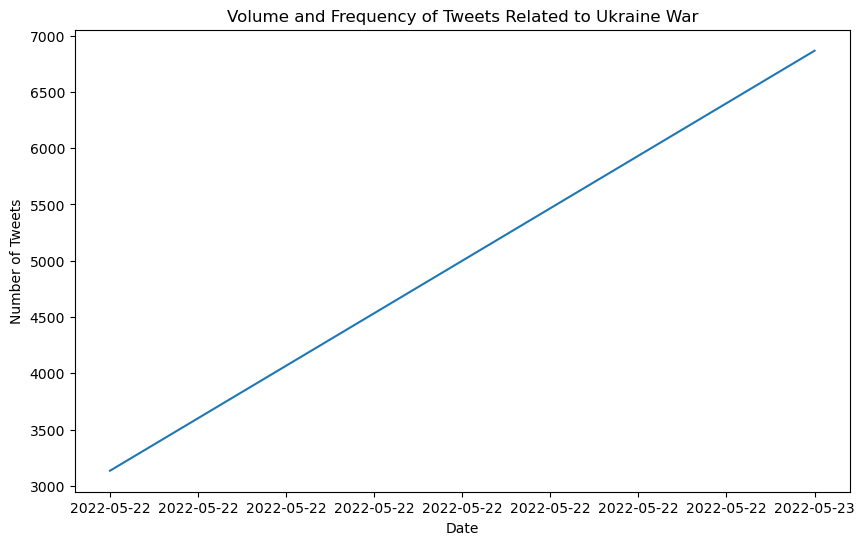

In [4]:
# extract date and time
df["Datetime"] = pd.to_datetime(df["Datetime"])
df["Date"] = df["Datetime"].dt.date
# group by date and count number of tweets
tweets_per_day = df.groupby("Date").size()

# plot graph
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(tweets_per_day.index, tweets_per_day.values)
ax.set_xlabel("Date")
ax.set_ylabel("Number of Tweets")
ax.set_title("Volume and Frequency of Tweets Related to Ukraine War")

# format x-axis ticks
date_format = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)

plt.show()

In [5]:
df["Date"] 

0        2022-05-23
1        2022-05-23
2        2022-05-23
3        2022-05-23
4        2022-05-23
            ...    
9996     2022-05-22
9997     2022-05-22
9998     2022-05-22
9999     2022-05-22
10000    2022-05-22
Name: Date, Length: 10001, dtype: object

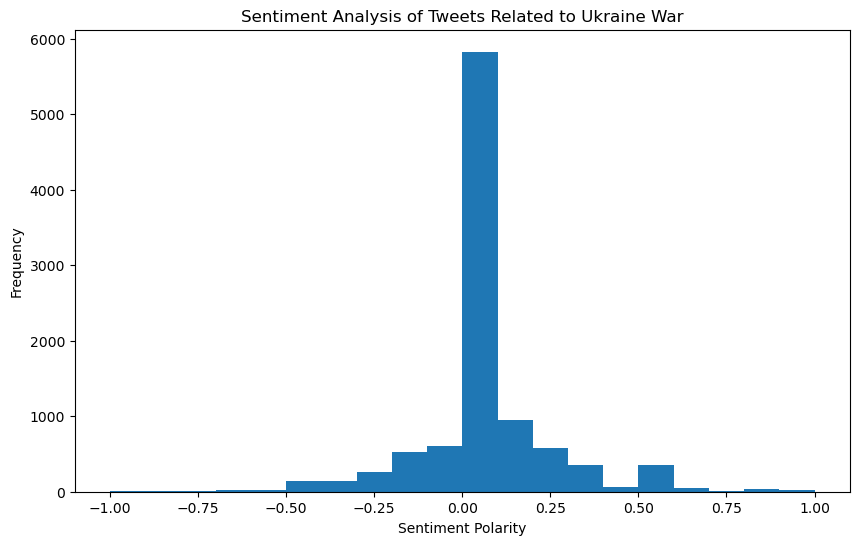

In [6]:

# create new column with sentiment polarity
df["Sentiment"] = df["Text"].apply(lambda x: TextBlob(x).sentiment.polarity)

# plot histogram
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df["Sentiment"], bins=20)
ax.set_xlabel("Sentiment Polarity")
ax.set_ylabel("Frequency")
ax.set_title("Sentiment Analysis of Tweets Related to Ukraine War")
plt.show()



C:\Users\DELL\AppData\Local\Temp\ipykernel_4292\2175644556.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^\w\s]', '')  # Remove punctuation


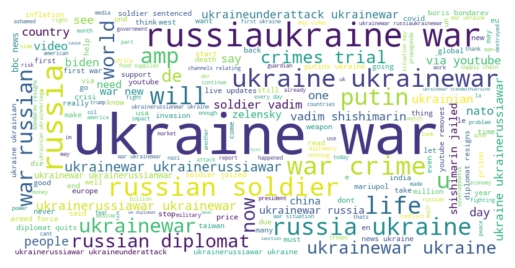

In [7]:

# Preprocess the text data
df['Text'] = df['Text'].str.lower()  # Convert to lowercase
df['Text'] = df['Text'].str.replace('[^\w\s]', '')  # Remove punctuation

# Create a word cloud of the most frequent words
all_text = ' '.join(df['Text'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

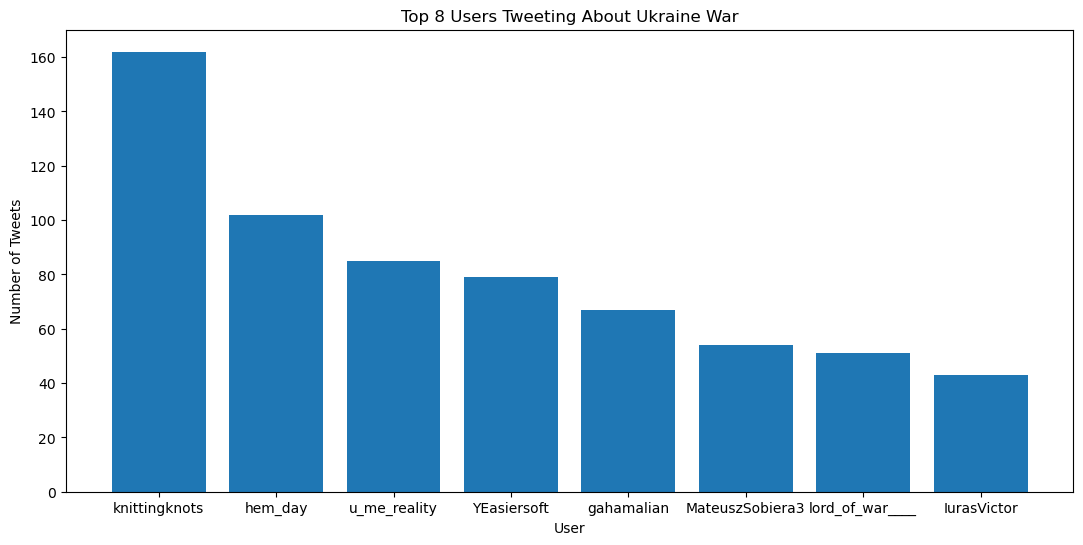

In [8]:
# extract relevant columns
df = df[["Text", "Username"]]

# count number of tweets by user
tweets_per_user = df.groupby("Username").size()

# sort by number of tweets
tweets_per_user = tweets_per_user.sort_values(ascending=False)

# plot graph
fig, ax = plt.subplots(figsize=(13, 6))
ax.bar(tweets_per_user[:8].index, tweets_per_user[:8].values)
ax.set_xlabel("User")
ax.set_ylabel("Number of Tweets")
ax.set_title("Top 8 Users Tweeting About Ukraine War")
plt.show()